## 1) Środowisko wirtualne python-venv

In [1]:
# python3 -m venv ha_influxdb_venv
# source ha_influxdb_venv/bin/activate
# pip install --upgrade pip
# pip install influxdb
# pip install pandas
# pip install matplotlib
# pip install jupyter
# jupyter notebook

## 2) Import bibliotek

In [2]:
from influxdb import DataFrameClient

import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## 3) Połączenie do bazy InfluxDB

In [3]:
client = DataFrameClient(host='192.168.1.5', port=8086, username='jupyterlab', password='jupyterlab', database='homeassistant')

In [4]:
client.ping()

'1.8.10'

## 4) Pobranie jednostek miar z bazy

In [5]:
client.get_list_measurements()

[{'name': ' '},
 {'name': '%'},
 {'name': '% available'},
 {'name': 'A'},
 {'name': 'B'},
 {'name': 'CAQI'},
 {'name': 'Connections'},
 {'name': 'Cos φ'},
 {'name': 'GB'},
 {'name': 'GHz'},
 {'name': 'GiB'},
 {'name': 'KiB/s'},
 {'name': 'MB'},
 {'name': 'Mb/s'},
 {'name': 'MiB'},
 {'name': 'PLN'},
 {'name': 'V'},
 {'name': 'VA'},
 {'name': 'VAr'},
 {'name': 'W'},
 {'name': '[GWh]'},
 {'name': 'cm'},
 {'name': 'dBm'},
 {'name': 'floors'},
 {'name': 'fps'},
 {'name': 'gCO2eq/kWh'},
 {'name': 'h'},
 {'name': 'hPa'},
 {'name': 'hPa/h'},
 {'name': 'kB'},
 {'name': 'kWh'},
 {'name': 'lqi'},
 {'name': 'lx'},
 {'name': 'm'},
 {'name': 'm/s'},
 {'name': 'ms'},
 {'name': 'm³'},
 {'name': 'objects'},
 {'name': 'packets'},
 {'name': 'packets/s'},
 {'name': 'pending update(s)'},
 {'name': 'queries'},
 {'name': 'requests'},
 {'name': 's'},
 {'name': 'state'},
 {'name': 'steps'},
 {'name': 'targets'},
 {'name': '°C'},
 {'name': '°C/h'},
 {'name': 'µGHz/s'},
 {'name': 'µg/m³'},
 {'name': '℃'}]

## 5) Lista encji HA

In [84]:
client.get_list_series()

## 6) Query do bazy

### 6.1) query #1: pobranie wszystkich encji HA z bazy InfluxDB dla np. pomiarów w "°C"

In [6]:
results = client.query('SELECT * FROM "°C" ')

In [7]:
results = results["°C"]
results = results.reset_index()
results

,index,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
0,2021-11-01 00:00:11.973617+00:00,None,temperature,sensor,processor_temperature,Processor temperature,total,36.00
1,2021-11-01 00:00:26.975167+00:00,None,temperature,sensor,processor_temperature,Processor temperature,total,35.00
2,2021-11-01 00:00:41.977120+00:00,None,temperature,sensor,processor_temperature,Processor temperature,total,34.00
3,2021-11-01 00:00:42.620802+00:00,None,temperature,sensor,xiaomi_salon_temperature,Salon Temp,measurement,21.10
4,2021-11-01 00:00:42.627261+00:00,None,None,sensor,dew_point,dew point,None,8.99
...,...,...,...,...,...,...,...,...
4206344,2022-09-14 13:38:46.691491+00:00,None,temperature,sensor,xiaomi_salon_temperature_2,Xiaomi_Salon Temperature,measurement,21.20
4206345,2022-09-14 13:38:49.174145+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,41.00
4206346,2022-09-14 13:38:54.663801+00:00,None,temperature,sensor,xiaomi_salon_temperature,Salon TEMP,measurement,21.30
4206347,2022-09-14 13:38:54.666423+00:00,None,None,sensor,dew_point,dew point,None,14.64


### 6.2) query #2: wszystkie encje HA dla "°C" z ostatnich 30 dni

In [8]:
results = client.query('SELECT * FROM "°C" WHERE time > now() - 30d AND time < now()')
df = results['°C'].reset_index()
df

,index,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
0,2022-08-15 13:40:48.661316+00:00,None,None,sensor,dew_point,dew point,None,19.98
1,2022-08-15 13:40:58.677919+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,48.00
2,2022-08-15 13:41:10.707851+00:00,None,None,sensor,dew_point,dew point,None,19.96
3,2022-08-15 13:41:28.682340+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,49.00
4,2022-08-15 13:41:34.158221+00:00,None,temperature,sensor,xiaomi_lazienka_gora_temperature,Xiaomi_Lazienka_gora Temperature,measurement,26.50
...,...,...,...,...,...,...,...,...
354986,2022-09-14 13:39:49.178349+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,44.00
354987,2022-09-14 13:40:14.843593+00:00,None,temperature,sensor,xiaomi_salon_temperature,Salon TEMP,measurement,21.20
354988,2022-09-14 13:40:14.845926+00:00,None,None,sensor,dew_point,dew point,None,14.64
354989,2022-09-14 13:40:14.891011+00:00,None,temperature,sensor,xiaomi_salon_temperature_2,Xiaomi_Salon Temperature,measurement,21.20


### 6.3) query #3: states dla "°C" z ostatnich 30 dni dla wybranego sensora (np. 'airly_temperature_2')

In [9]:
sensor = 'airly_temperature_2'                  # wpisujemy dowolny dla "°C" 

df_airly_temp_30 = df[df['entity_id'] == sensor ]
df_airly_temp_30.head()

,index,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
57,2022-08-15 13:47:20.288358+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,28.0
154,2022-08-15 13:57:20.304628+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,28.1
547,2022-08-15 14:42:20.287950+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,28.0
636,2022-08-15 14:52:20.291454+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,27.9
810,2022-08-15 15:12:20.305034+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,27.8


## 7) Nowy dataframe dla wybranego sensora - usuwamy niepotrzebne kolumny

In [10]:
new_df = df_airly_temp_30.drop(columns=['attribution_str', 'device_class_str', 'domain', 'entity_id', 'friendly_name_str', 'state_class_str' ])
new_df.head()

,index,value
57,2022-08-15 13:47:20.288358+00:00,28.0
154,2022-08-15 13:57:20.304628+00:00,28.1
547,2022-08-15 14:42:20.287950+00:00,28.0
636,2022-08-15 14:52:20.291454+00:00,27.9
810,2022-08-15 15:12:20.305034+00:00,27.8


In [11]:
print("W zebranych danych mamy :", new_df.shape[0], " rekordów dla sensora", sensor)

W zebranych danych mamy : 5060  rekordów dla sensora airly_temperature_2


## 8) Funkcja obliczające trend na bazie pandas.polyfit()

### 8.1) Przygotowanie osi X dla wykresu do pre

In [12]:
x= np.arange(new_df['index'].size)
x

array([   0,    1,    2, ..., 5057, 5058, 5059])

### 8.2) Predykcja trendu (średnioterminowego dla 30 dni)

In [13]:
#Fit function : y = mx + c [regresja liniowa ]

fit = np.polyfit(x,new_df['value'], deg=1)
print ("m = : " + str(fit[0]))
print ("c = : " + str(fit[1]))

m = : -0.002768421033926142
c = : 26.07649570887349


In [14]:
if fit[0] > 0:
    trend = 1
    print("Trend rosnący:", trend)
elif fit[0]:
    trend = -1
    print("Trend malejący:", trend)

Trend malejący: -1


### 8.3) Wykres linii trendu

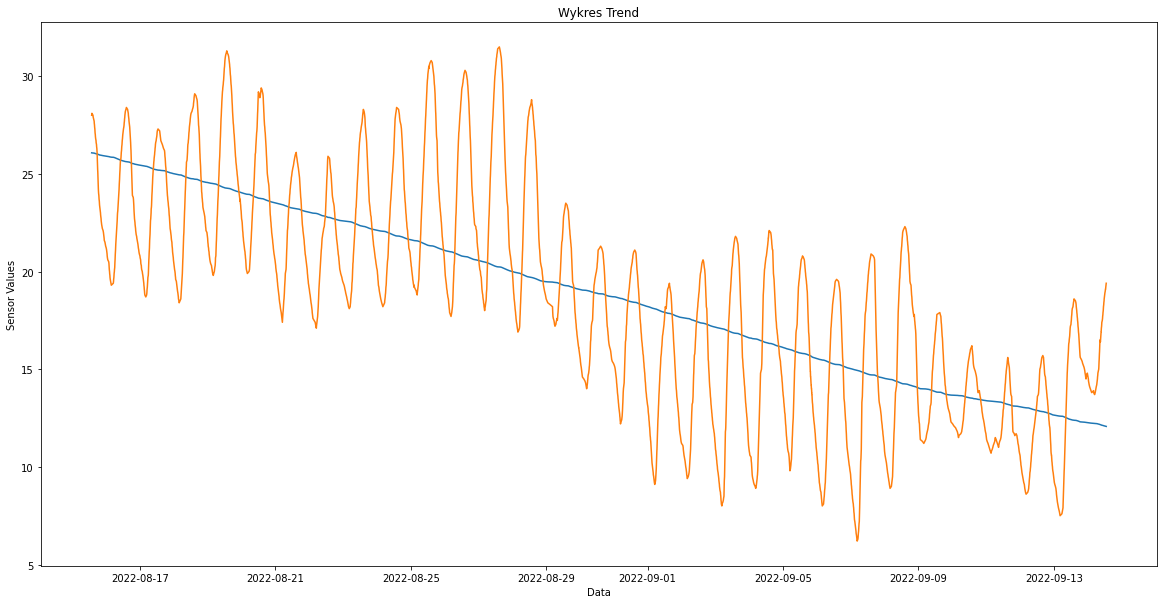

In [15]:
fit_function = np.poly1d(fit)

fig = plt.figure(figsize=(20,10))

plt.plot(new_df['index'], fit_function(x))     
plt.plot(new_df['index'], new_df['value'])

plt.xlabel('Data')
plt.ylabel('Sensor Values')
plt.title('Wykres Trend')
plt.show()

## 9) Bonus: wykorzystanie funkcji z integracji Trend z HA

In [16]:
def calculate_gradient(X,Y):
    """Compute the linear trend gradient of the current samples. """
    timestamps = X
    values = Y
    coeffs = np.polyfit(timestamps, values, 1)
    return coeffs[0]

In [17]:
x = x
y = new_df['value']

In [18]:
calculate_gradient(x,y)

-0.002768421033926142

### 9.1) binary_sensor

In [19]:
if calculate_gradient(x,y) > 0:
    trend = 1
    print("Trend rosnący:", trend)
elif calculate_gradient(x,y) < 0:
    trend = -1
    print("Trend malejący:", trend)

Trend malejący: -1
